# Question 5

In [4]:
df <- read.csv('data-p2/all_interactions_mimic3d.csv')

# x1 <- df$NumCallouts
# x2 <- df$NumCallouts.NumTransfers
# x3 <- df$NumDiagnosis.AdmitProcedure_7
# x4 <- df$NumOutput.admit_type_NEWBORN
# x5 <- df$NumRx.AdmitProcedure_4
# x6 <- df$NumTransfers.insurance_Private
# x7 <- df$NumChartEvents.admit_type_NEWBORN
# x8 <- df$NumChartEvents.AdmitProcedure_7
# x9 <- df$admit_type_NEWBORN.AdmitProcedure_5
# x10 <- df$AdmitProcedure_6.AdmitProcedure_8

x1 <- df$NumCallouts
x2 <- df$NumCallouts.NumTransfers
x3 <- df$NumRx.AdmitProcedure_4
x4 <- df$NumTransfers.insurance_Private
x5 <- df$NumChartEvents.admit_type_NEWBORN

# x1 <- df$NumTransfers
# x2 <- df$NumCallouts
# x3 <- df$NumTransfers.admit_type_EMERGENCY
# x4 <- df$NumCallouts
# x5 <- df$NumCallouts.admit_type_EMERGENCY
x <- model.matrix(~ . - 1, data = df[, !names(df) %in% c('LOSdays')]) 
y <- df$LOSdays

set.seed(0)

In [3]:
library(MASS)

Warning message:
"package 'MASS' was built under R version 4.4.1"


In [5]:
model <- lm(y ~ x1+x2+x3+x4+x5)

# Get the summary of the model
summary_model <- summary(model)

# Display the summary
summary_model


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.355  -5.172  -2.054   1.376 191.360 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.275548   0.218725  46.979  < 2e-16 ***
x1          -21.558029   1.560745 -13.813  < 2e-16 ***
x2            6.778423   0.784891   8.636  < 2e-16 ***
x3           -0.272798   0.038576  -7.072 1.90e-12 ***
x4           -0.966814   0.179549  -5.385 7.82e-08 ***
x5            0.018115   0.001467  12.347  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.62 on 2970 degrees of freedom
Multiple R-squared:  0.131,	Adjusted R-squared:  0.1295 
F-statistic: 89.53 on 5 and 2970 DF,  p-value: < 2.2e-16


In [5]:
stepwise_model <- stepAIC(model, direction = "both")

# Display the results
summary(stepwise_model)

Start:  AIC=14748.88
y ~ NumTransfers + NumCallouts.NumTransfers + NumTransfers.admit_type_EMERGENCY + 
    NumCallouts + NumCallouts.admit_type_EMERGENCY + NumCallouts.NumProcs + 
    NumTransfers.insurance_Medicare + NumProcEvents.NumTransfers + 
    NumCallouts.NumMicroLabs + NumDiagnosis + NumCallouts.NumDiagnosis + 
    NumMicroLabs + NumTransfers.insurance_Private + NumCallouts.insurance_Medicare + 
    NumTransfers.admit_location_EMERGENCY.ROOM.ADMIT



                                                   Df Sum of Sq    RSS   AIC
- NumTransfers                                      1       1.3 418121 14747
- NumCallouts.NumMicroLabs                          1       7.7 418127 14747
- NumCallouts.insurance_Medicare                    1      14.6 418134 14747
- NumMicroLabs                                      1      15.6 418135 14747
- NumCallouts.NumDiagnosis                          1      49.2 418169 14747
- NumDiagnosis                                      1      82.7 418202 14748
- NumCallouts.admit_type_EMERGENCY                  1      98.6 418218 14748
<none>                                                          418120 14749
- NumTransfers.admit_location_EMERGENCY.ROOM.ADMIT  1     642.4 418762 14751
- NumCallouts.NumTransfers                          1     921.2 419041 14753
- NumTransfers.admit_type_EMERGENCY                 1    1592.6 419712 14758
- NumProcEvents.NumTransfers                        1    1816.3 419936 14760


Call:
lm(formula = y ~ NumCallouts.NumTransfers + NumTransfers.admit_type_EMERGENCY + 
    NumCallouts + NumCallouts.NumProcs + NumTransfers.insurance_Medicare + 
    NumProcEvents.NumTransfers + NumTransfers.insurance_Private + 
    NumTransfers.admit_location_EMERGENCY.ROOM.ADMIT, data = as.data.frame(x))

Residuals:
    Min      1Q  Median      3Q     Max 
-13.727  -5.967  -2.411   1.025 193.034 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                        9.487181   0.221354  42.860
NumCallouts.NumTransfers                           3.976739   1.061842   3.745
NumTransfers.admit_type_EMERGENCY                 -0.819092   0.198623  -4.124
NumCallouts                                      -18.718418   1.612764 -11.606
NumCallouts.NumProcs                              -4.083571   0.818097  -4.992
NumTransfers.insurance_Medicare                   -1.280669   0.243746  -5.254
NumProcEvents.NumTransfers  

In [6]:
model_summary <- summary(stepwise_model)

# Extract coefficients and p-values
coefficients <- model_summary$coefficients

significant_predictors <- rownames(coefficients)[coefficients[, "Pr(>|t|)"] < 0.0001]

print(significant_predictors)

[1] "(Intercept)"                       "NumTransfers.admit_type_EMERGENCY"
[3] "NumCallouts"                       "NumCallouts.NumProcs"             
[5] "NumTransfers.insurance_Medicare"   "NumTransfers.insurance_Private"   


In [44]:
# x1 <- df$NumTransfers.admit_type_EMERGENCY
# x2 <- df$NumCallouts
# x3 <- df$NumCallouts.NumProcs
# x4 <- df$NumTransfers.insurance_Medicare
# x5 <- df$NumTransfers.insurance_Private

x1 <- df$NumTransfers
x2 <- df$NumCallouts
x3 <- df$NumCallouts.NumTransfers
x4 <- df$NumCallouts.admit_type_EMERGENCY
x5 <- df$admit_type_EMERGENCY

In [35]:
likehd <- function(param){
  param <- as.numeric(param)
  a1 <- param[1]
  a2 <- param[2]
  a3 <- param[3]
  a4 <- param[4]
  a5 <- param[5]
  b <- param[6]
  sd = param[7]

  pred = as.numeric(x1 * a1 + x2 * a2 + x3 * a3 + x4 * a4 + x5 * a5) + b

  if (sd <= 0) {
    return(-Inf)  # Invalid standard deviation, return -Inf
  }

  singlelikelihoods = dnorm(y, mean = pred, sd = sd, log = TRUE)
  sumll = sum(singlelikelihoods)
  

  # print(paste("Log-likelihood:", sumll))
  
  return(sumll)
}

In [42]:
prior <- function(param, lambda = 1) {
  param <- as.numeric(param)
  a1 <- param[1]
  a2 <- param[2]
  a3 <- param[3]
  a4 <- param[4]
  a5 <- param[5]
  b <- param[6]
  sd <- param[7]

  # Ensure sd is valid and not NA
  if (is.na(sd) || sd <= 0) {
    return(-Inf)  # Return -Inf if sd is not valid (invalid prior for sd)
  }

  epsilon <- 1e-6  # Small constant to avoid log(0)
  
  a1prior <- -log(abs(a1) + epsilon)
  a2prior <- -log(abs(a2) + epsilon)
  a3prior <- -log(abs(a3) + epsilon)
  a4prior <- -log(abs(a4) + epsilon)
  a5prior <- -log(abs(a5) + epsilon)
  bprior <- -log(abs(b) + epsilon)

  # Jeffrey's prior for intercept (assuming it's also on a continuous real scale)
  bprior <- -log(abs(b))

  # Exponential prior for standard deviation (sd), assuming positive values only
  sdprior <- dexp(sd, rate = lambda, log = TRUE)

  # Debug: Print log-prior values for diagnostic purposes
  print(paste("Prior a1:", a1prior, "a2:", a2prior, "b:", bprior, "sd:", sdprior))

  # Return sum of all priors (log scale)
  return(a1prior + a2prior + a3prior + a4prior + a5prior + bprior + sdprior)
}


In [37]:
posterior <- function(param) {
  # Calculate likelihood and prior
  like_val <- likehd(param)
  prior_val <- prior(param)
  
  # Check for NA or invalid values in likelihood and prior
  if (is.na(like_val) || is.na(prior_val)) {
    return(-Inf)  # Return very small value if there's an issue
  }
  
  return(like_val + prior_val)
}

In [45]:
likehd <- function(param, x1, x2, x3, x4, x5, y){
  param <- as.numeric(param)
  a1 <- param[1]
  a2 <- param[2]
  a3 <- param[3]
  a4 <- param[4]
  a5 <- param[5]
  b <- param[6]
  sd = param[7]

  pred = as.numeric(x1 * a1 + x2 * a2 + x3 * a3 + x4 * a4 + x5 * a5) + b

  if (is.na(sd) || sd <= 0) {
    return(-Inf)
  }

  singlelikelihoods = dnorm(y, mean = pred, sd = sd, log = TRUE)
  sumll = sum(singlelikelihoods)
  
  return(sumll)
}

prior <- function(param, lambda = 1) {
  param <- as.numeric(param)
  a1 <- param[1]
  a2 <- param[2]
  a3 <- param[3]
  a4 <- param[4]
  a5 <- param[5]
  b <- param[6]
  sd <- param[7]

  if (is.na(sd) || sd <= 0) {
    return(-Inf)
  }

  epsilon <- 1e-6  # Small constant to avoid log(0)
  
  a1prior <- -log(abs(a1) + epsilon)
  a2prior <- -log(abs(a2) + epsilon)
  a3prior <- -log(abs(a3) + epsilon)
  a4prior <- -log(abs(a4) + epsilon)
  a5prior <- -log(abs(a5) + epsilon)
  bprior <- -log(abs(b) + epsilon)

  sdprior <- dexp(sd, rate = lambda, log = TRUE)

  print(paste("Prior a1:", a1prior, "a2:", a2prior, "b:", bprior, "sd:", sdprior))

  return(a1prior + a2prior + a3prior + a4prior + a5prior + bprior + sdprior)
}

posterior <- function(param, x1, x2, x3, x4, x5, y) {
  like_val <- likehd(param, x1, x2, x3, x4, x5, y)
  prior_val <- prior(param)
  
  if (is.na(like_val) || is.na(prior_val)) {
    return(-Inf)
  }
  
  return(like_val + prior_val)
}

proposalfunction <- function(param){ 
  proposal <- rnorm(5, mean = param[1:5], sd = rep(0.01, 5))  
  proposal_sd <- abs(rnorm(1, mean = param[6], sd = 0.01))  
  if (proposal_sd < 1e-6) {
    proposal_sd <- 1e-6
  }
  
  return(c(proposal, proposal_sd))
}

run_metropolis_MCMC <- function(startvalue, iterations, x1, x2, x3, x4, x5, y){
  num_params <- length(startvalue)
  chain = array(dim = c(iterations + 1, num_params))
  chain[1,] = startvalue
  
  for (i in 1:iterations){
    proposal = proposalfunction(chain[i,])

    print("Calculating posterior for proposal:")
    print(proposal)
    
    post_proposal <- posterior(proposal, x1, x2, x3, x4, x5, y)  
    print(paste("Posterior for proposal:", post_proposal))

    post_chain <- posterior(chain[i,], x1, x2, x3, x4, x5, y)
    print(paste("Posterior for current chain:", post_chain))
    
    probab <- exp(post_proposal - post_chain)  
    print(paste("Acceptance probability:", probab))  

    if (is.na(probab) || is.nan(probab)) {
      probab <- 0
    } else {
      probab <- min(probab, 1)
    }

    if (runif(1) < probab){
      chain[i + 1,] = proposal
    } else {
      chain[i + 1,] = chain[i,]
    }
  }
  
  return(chain)
}

start_value <- runif(6)
chain <- run_metropolis_MCMC(start_value, 10000, x1, x2, x3, x4, x5, y)

[1] "Calculating posterior for proposal:"
[1]  0.5249173387 -0.0007881945  0.0262198611  0.6082845258  0.0711240304
[6]  0.6076799462
[1] "Posterior for proposal: -Inf"
[1] "Posterior for current chain: -Inf"
[1] "Acceptance probability: NaN"
[1] "Calculating posterior for proposal:"
[1] 0.52021910 0.00278144 0.02573789 0.60522770 0.04016926 0.60680171
[1] "Posterior for proposal: -Inf"
[1] "Posterior for current chain: -Inf"
[1] "Acceptance probability: NaN"
[1] "Calculating posterior for proposal:"
[1]  0.536439430 -0.004343536  0.034638875  0.609817734  0.030909859
[6]  0.619326435
[1] "Posterior for proposal: -Inf"
[1] "Posterior for current chain: -Inf"
[1] "Acceptance probability: NaN"
[1] "Calculating posterior for proposal:"
[1] 0.50924144 0.01940431 0.02448668 0.60690155 0.06178907 0.60301319
[1] "Posterior for proposal: -Inf"
[1] "Posterior for current chain: -Inf"
[1] "Acceptance probability: NaN"
[1] "Calculating posterior for proposal:"
[1] 0.53177010 0.01347903 0.02748391

In [13]:
burnIn = 5000
acceptance = 1-mean(duplicated(chain[-(1:burnIn),]))

In [14]:
print(head(chain[-(1:burnIn), 1]))  # Check the first few values of the chain after burn-in
print(summary(chain[-(1:burnIn), 1]))  # Summary statistics of the chain for parameter a

[1] -0.1392708 -0.1392708 -0.1392708 -0.1392708 -0.1392708 -0.1390526


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.2334 -0.1972 -0.1907 -0.1851 -0.1732 -0.1245 


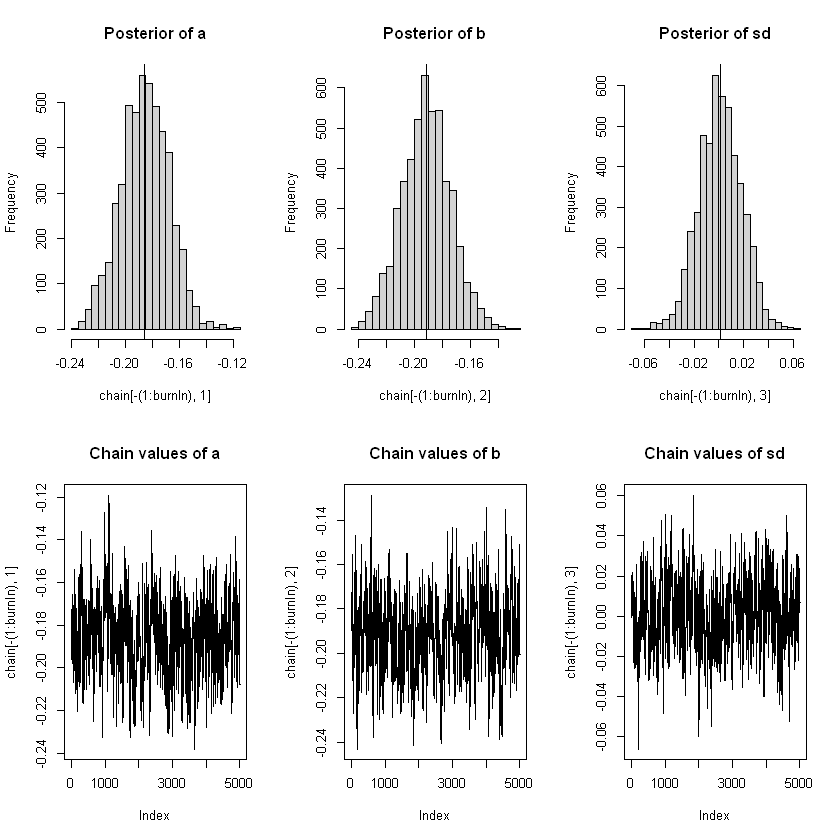

In [19]:
par(mfrow = c(2,3))
hist(chain[-(1:burnIn),1],nclass=30, main="Posterior of a")
abline(v = mean(chain[-(1:burnIn),1]))
# abline(v = t.A, col="red" )
hist(chain[-(1:burnIn),2],nclass=30, main="Posterior of b")
abline(v = mean(chain[-(1:burnIn),2]))
# abline(v = t.B, col="red" )
hist(chain[-(1:burnIn),3],nclass=30, main="Posterior of sd")
abline(v = mean(chain[-(1:burnIn),3]) )
# abline(v = t.sd, col="red" )
plot(chain[-(1:burnIn),1], type = "l", main = "Chain values of a")
# abline(h = t.A, col="red" )
plot(chain[-(1:burnIn),2], type = "l", main = "Chain values of b")
# abline(h = t.B, col="red" )
plot(chain[-(1:burnIn),3], type = "l", main = "Chain values of sd")
# abline(h = t.sd, col="red" )

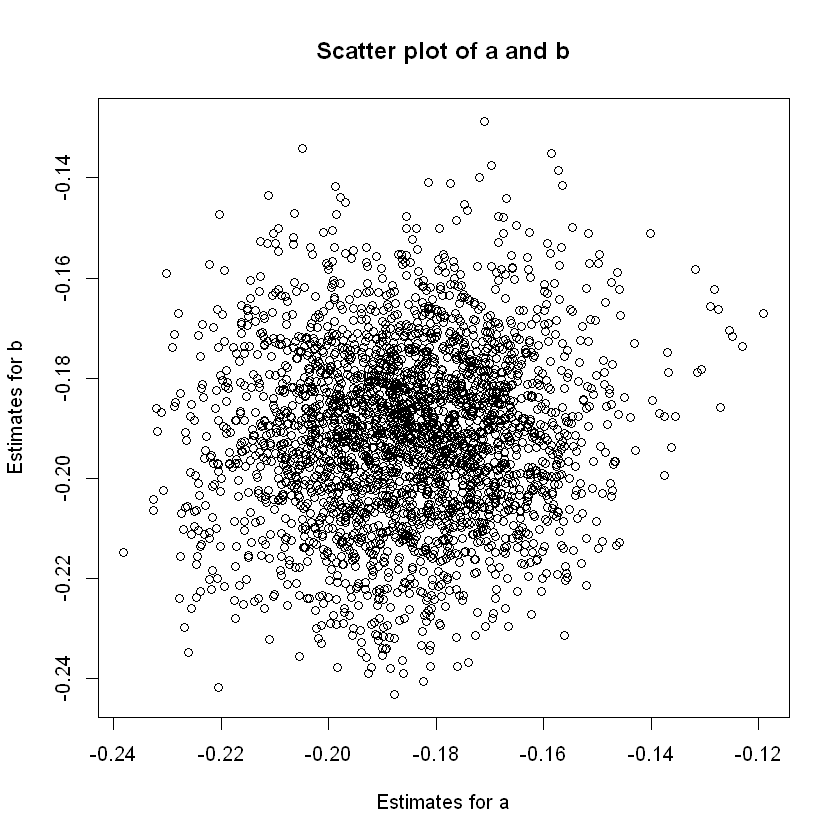

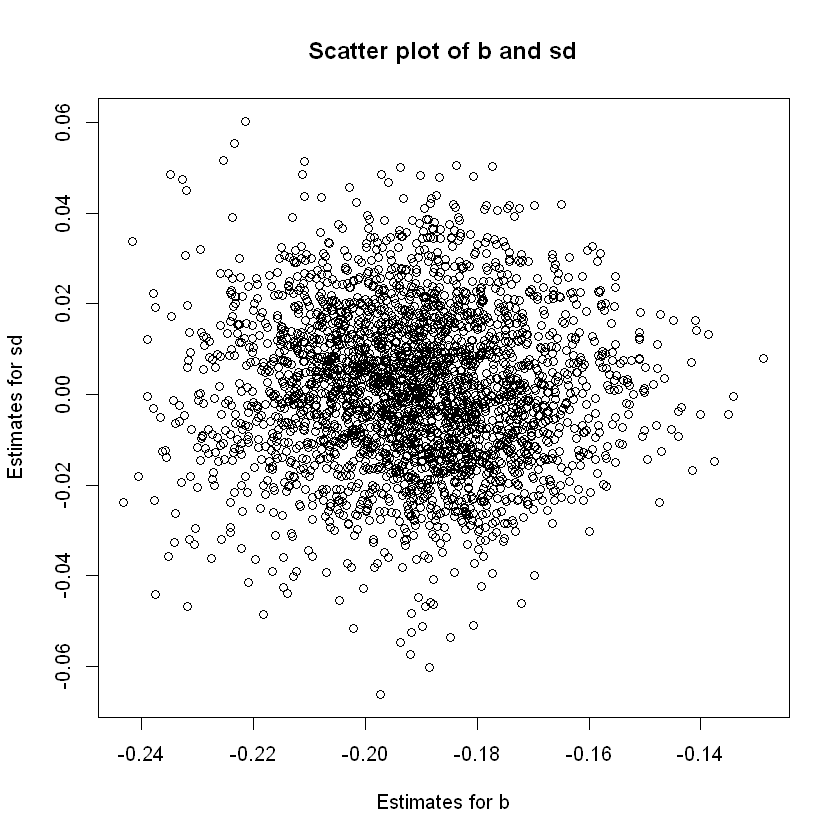

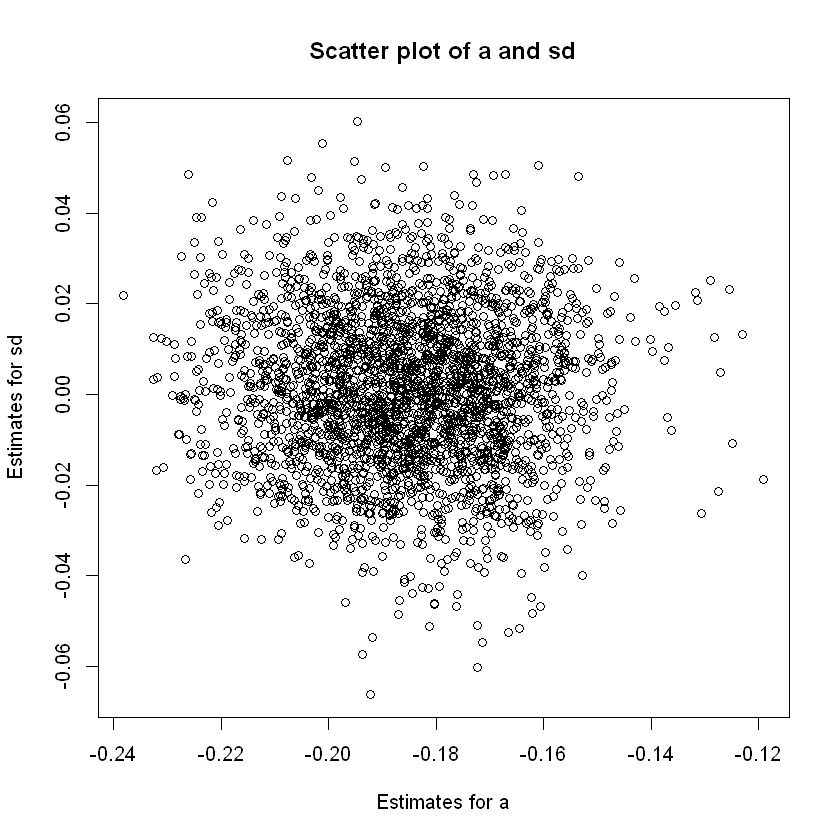

In [20]:
plot(chain[-(1:burnIn),1:2], main="Scatter plot of a and b",
xlab="Estimates for a", ylab="Estimates for b")
# abline(v = t.A, col="red" )
# abline(h = t.B, col="red" )
plot(chain[-(1:burnIn),2:3], main="Scatter plot of b and sd",
xlab="Estimates for b", ylab="Estimates for sd")
# abline(v = t.B, col="red" )
# abline(h = t.sd, col="red" )
plot(chain[-(1:burnIn),c(1,3)], main="Scatter plot of a and sd",
xlab="Estimates for a", ylab="Estimates for sd")
# abline(v = t.A, col="red" )
# abline(h = t.sd, col="red" )

ERROR: Error in eval(predvars, data, env): object 'y' not found
